# Статистика, DS-поток
## Задание SP.3

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Баллы за задание:**

* Задача 1 &mdash; 60 баллов
* Задача 3 &mdash; 80 баллов
* Задача 4 &mdash; 60 баллов

**Важность задач:**

* *высокая:* задачи 1, 2;
* *средне-высокая:* задача 3.

Степень важности задач не связана с количеством баллов и определяется только на основе оценки полезности задачи с точки зрения усвоения текущего и дальнейшего материала. Например, если вы что-то не успеваете, рекомендуется в первую очередь выполнять более важные задачи.

<b><font size="5">Дорешка:</font></b>

* <b><font size="4">Задача 1</font></b>
  * <b><font color="#00b565" size="3">Исправил интервал Вальда</font></b>

* <b><font size="4">Задача 2</font></b>
  * <b><font color="#00b565" size="3">Исправил график</font></b>

  * <b><font color="#00b565" size="3">Добавил точки выборки</font></b>

  * <b><font color="#00b565" size="3">Сравнил доли покрытия истинного значения параметра сдвига</font></b>

* <b><font size="4">Задача 3</font></b>
  * <b><font color="#00b565" size="3">Добавил графики</font></b>

  * <b><font color="#00b565" size="3">Добавил объяснение природы явлений</font></b>




In [1]:
# Bot check

# HW_ID: ds_sp3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(font_scale=1.5, palette='Set2')

*Замечания.*
1. Вы должны помнить о разнице между оценкой / доверительным интервалом и *реализацией* оценки / доверительного интервала. На практике обычно слово *реализация* опускается.
2. Если оценка/интервал получен на лекции/семинаре, то нужно просто выписать формулу. Если такой случай не рассматривался, то нужно добавить его вывод.
3. Выборку надо сгенерировать один раз. Дело в том, что на практике при недостаточном размере выборки разумнее дособрать выборку, чем заново проводить все измерения.

______________
## Задача 1.

Пусть $X = (X_1, ..., X_n)$ &mdash; выборка из распределения $U[0, \theta]$. Постройте асимптотические доверительные интервалы: Вальда и на основе аппроксимации $X_{(n)}$ некоторым распределением (см. задание ST.3). Для этого сгенерируйте выборку $X_1, ... X_{N}, N = 100$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок размера $n$ вида $X_1, ... X_n$, $1 \le n \le 100$, используя функцию из задания SP.2. Нужно нанести на график точки выборки.

Для двух статистик, используемых при построении интервалов, запишите аппроксимацию некоторым распределением неформально в виде "статистика по выборке достаточно большого размера приближенно имеет такое-то распределение". 

Сделайте вывод о том, как влияет на ширину интервала вид статистики и аппроксимация.

**Решение:**

In [3]:
N = 100
theta = np.random.randint(1, 10)
alpha = 0.95

X = np.random.uniform(0, theta, N)

Асимтотический доверительный интервал Вальда для $\theta$ уровня доверия $\alpha$ имеет вид $\left(\frac{2\overline{X}}{1+\frac{z}{\sqrt{3}}}, \frac{2\overline{X}}{1-\frac{z}{\sqrt{3}}} \right)$, где $z = z_{\frac{1+\alpha}{2}}$ -- квантиль нормального распределения.(Вывод см ST.3 №7, п. a))

В ST.3 №7 б) мы получили, что асимтотический интервал имеет вид $\theta \in \left(2\overline{X} - z_{\frac{1 + a}{2}} \frac{2\overline{X}}{\sqrt{3n}}, \overline{X} + z_{\frac{1 + a}{2}} \frac{2\overline{X}}{\sqrt{3n}} \right)$ 

In [4]:
def cumulative_mean(arr):
    """
    Вычисляет кумулятивное среднее для заданного массива.
    
    Parameters:
    arr (np.ndarray): Входной массив чисел.
    
    Returns:
    np.ndarray: Массив кумулятивных средних.
    """
    return np.cumsum(arr) / np.arange(1, len(arr) + 1)

def cumulative_max(arr):
    """
    Вычисляет кумулятивную старшую порядковую статистику (максимум) для заданного массива.
    
    Parameters:
    arr (np.ndarray): Входной массив чисел.
    
    Returns:
    np.ndarray: Массив кумулятивных максимумов.
    """
    return np.maximum.accumulate(arr)

def draw_confidence_interval(
    left,
    right,
    estimation=None,
    sample=None,
    ylim=(None, None),
    xlim=(None, None),
    color_estimation="#FF3300",
    color_interval=["#00CC66"],
    color_sample="#0066FF",
    label_estimation=["Оценка"],
    dots_flag=False,
    plot_name = "Связь Д.И. с оценкой",
    statistics_name = "theta", 
    true_value = 0
):
    """
    Рисует доверительный интервал и оценку в зависимости от размера выборки.

    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param color_estimation: цвет оценки
    :param color_interval: цвет интервала
    :param color_sample: цвет выборки
    :param label_estimation: подпись для оценки
    """
    plt.figure(figsize=(12, 8))
    plt.axhline(y=true_value, color='r', linestyle='--', linewidth=2, label=(r'Настоящее значение $%s$' % statistics_name))

    once_flag = True
    for tmp_left, tmp_right, tmp_color_interval, tmp_label_estimation in zip(
        left, right, color_interval, label_estimation
    ):
        size = estimation.shape[0]
        x = np.arange(size) + 1

        if once_flag:
            plt.plot(
                x,
                estimation,
                marker=".",
                color=color_estimation,
                label=(r"Оценка $\%s$" % statistics_name),
            )

        plt.plot(x, tmp_right, ls="-", color=tmp_color_interval)
        plt.plot(x, tmp_left, ls="-", color=tmp_color_interval)
        plt.fill_between(
            x,
            tmp_left,
            tmp_right,
            color=tmp_color_interval,
            alpha=0.3,
            label=tmp_label_estimation,
        )

        if dots_flag and once_flag:
            plt.plot(
                x,
                sample,
                alpha=0.55,
                ls=" ",
                marker="o",
                color="orange",
                label="Выборка",
            )
        once_flag = False

    if xlim[0] is None:
        plt.xlim((1, size + 1))
    else:
        plt.xlim(xlim)
    plt.ylim(ylim)

    plt.xlabel("Размер выборки")
    plt.ylabel("Значение оценки")
    plt.title(plot_name)
    plt.legend()
    plt.grid(True)
    plt.show()

Для начала вычислим доверительный интервал Вальда

In [5]:
z = sps.norm.ppf((1 + alpha) / 2)

estimation_Vald = 2 * cumulative_mean(X)

denom = np.arange(1, N + 1)
left_Vald = estimation_Vald / (1 + z / (np.sqrt(3*denom)))
right_Vald = estimation_Vald / (1 - z / (np.sqrt(3*denom)))

<b><font color="#00b565" size="5">Исправил формулу интервала Вальда</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i>Неправильный интервал Вальда. Инд. комм. Должно быть sqrt(3n) в знаменателе</i>

Теперь вычислим ДИ при помощи $X_{(n)}$

In [6]:
def Indicator_positive(x):
    result = (x > 0).astype(int)
    return result


N_s = np.arange(1, N + 1)
estimation_X_n = cumulative_max(X)


left_X_n = estimation_Vald - z * estimation_Vald / np.sqrt(3 * N_s)

right_X_n = estimation_Vald + z * estimation_Vald / np.sqrt(3 * N_s)

<b><font color="#00b565" size="5">Конец исправлений</font></b>


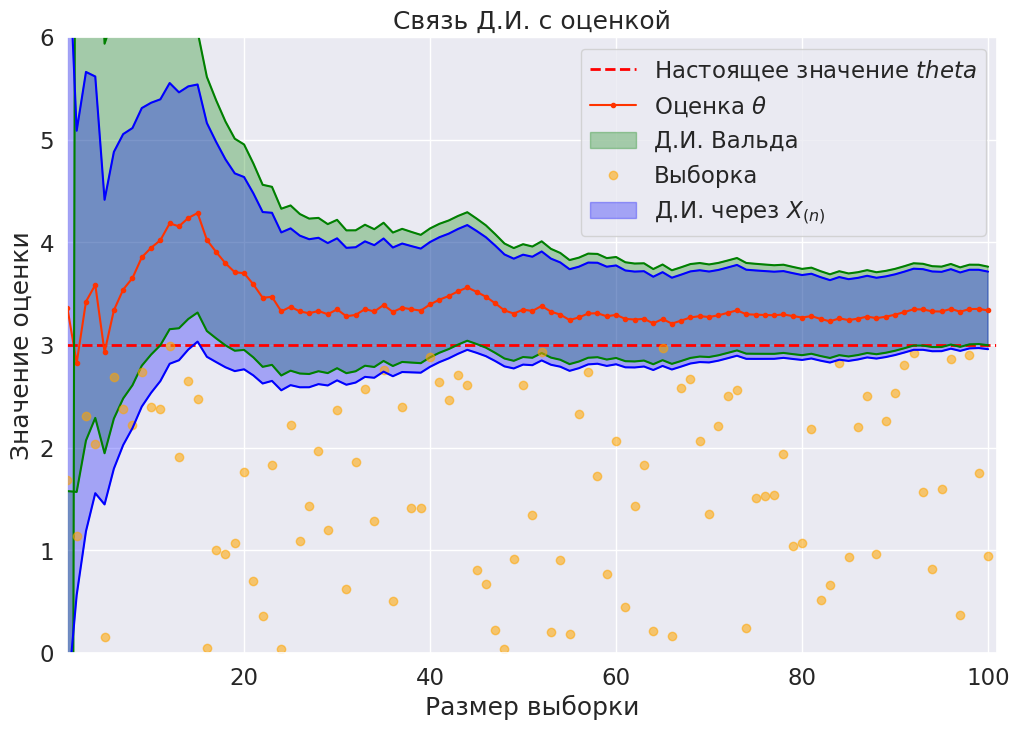

In [7]:
draw_confidence_interval(
    [left_Vald, left_X_n],
    [right_Vald, right_X_n],
    color_interval=["green", "blue"],
    estimation=estimation_Vald,
    sample=X,
    label_estimation=["Д.И. Вальда", r"Д.И. через $X_{(n)}$"],
    ylim=(theta - 3, theta + 3),
    dots_flag=True, 
    true_value=theta,
    statistics_name=r"theta"
)

Как видим, покрытие использующее n-ю порядковую статистику является крайне узким, причем сужается еще больше при больших $\theta$.

Сравните два исследуемых интервала по величине доли покрытия истинного значения $\theta$. Посмотрите примеры в ноутбуке с семинара.

In [8]:
coverage_Vald = (left_Vald <= theta) & (right_Vald >= theta)
coverage_rate_Vald = np.mean(coverage_Vald)

coverage_X_n = (left_X_n <= theta) & (right_X_n >= theta)
coverage_rate_X_n = np.mean(coverage_X_n)

print(f"Доля покрытия для асимптотических интервалов: {coverage_rate_Vald:.3f}")
print(f"Доля покрытия для t-интервалов: {coverage_rate_X_n:.3f}")

Доля покрытия для асимптотических интервалов: 0.870
Доля покрытия для t-интервалов: 0.990


Распределение при использовании $X_{(n)}$ при большой выборке напоминает дополнение к экспоненциальному распределению.

Распределенеи при использовании $2 \overline{X}$ напомниает нормальное распределение.

**Вывод:** На практике сравнили два способа задания доверительного интеравала для параметра $\theta$ распределения $U[0, \theta]$. Было выявлено, что построение д.и. ипользуя n-ю порядковую статистику при больших выборках лучше, чем использовать оценку $2 \cdot \overline{X}$ и находить д.и. через нее используя ЦПТ.

__________________
## Задача 2.
 В данном задании вам нужно изучить доверительные интервалы для параметра сдвига в нормальной модели в случае неизвестной дисперсии. Требуется построить: 
 * асимтотический доверительный интервал при помощи центральной предельной теоремы и леммы Слуцкого;
 * точный неасимптотический при помощи распределений хи-квадрат, Стьюдента.

Вывод этих интервалов был разобран на лекции. Выпишите только ответы.

Асимптотический доверительный интервал: $\left(\overline{X} - z_{\frac{1+\alpha}{2}} \cdot \frac{S}{\sqrt{n}}, \overline{X} + z_{\frac{1+\alpha}{2}} \cdot \frac{S}{\sqrt{n}}, \right)$

Точный доверительный интервал: $\left(\overline{X} - \frac{T_{n-1, \frac{1+\alpha}{2}}}{\sqrt{n-1}} \cdot S, \overline{X} + \frac{T_{n-1, \frac{1+\alpha}{2}}}{\sqrt{n-1}} \cdot S\right)$

Реализуйте функции построения этих интервалов по выборке. Задокументируйте функции (см. [гайд](https://realpython.com/documenting-python-code/)).

In [9]:
def cumulative_variance_from_row(row):
    """ 
    Функция для вычисления кумулятивной выборочной дисперсии для одной строки.
    
    row: одномерный массив (или список), представляющий значения в строке.
    Возвращает массив кумулятивных выборочных дисперсий.
    """
    n = len(row)
    cum_variance = np.zeros(n)
    for i in range(1, n + 1):
        cum_variance[i-1] = np.var(row[:i], ddof=0)
        
    return cum_variance


In [10]:
def calculate_asymptotic_confidence_intervals(sample, alpha=0.95):
    """
    Рассчитывает асимптотические доверительные интервалы для кумулятивного среднего.

    Параметры:
    -----------
    sample : np.ndarray
        Одномерный массив наблюдений, для которых необходимо рассчитать интервалы.
    
    alpha : float, по умолчанию 0.95
        Уровень доверия (1 - alpha) для доверительного интервала.
        
    Возвращает:
    -----------
    tuple of np.ndarray
        Кортеж, состоящий из двух массивов: левая и правая границы доверительного интервала 
        для каждого элемента кумулятивного среднего.
    """

    size = len(sample)
    sample_mean = cumulative_mean(sample)

    # Будем брать несмещенную выборочную дисперсию
    sample_S = np.sqrt(cumulative_variance_from_row(sample))

    z = sps.norm.ppf((1 + alpha) / 2)

    denom = np.arange(1, size + 1)
    left = sample_mean - z * sample_S / np.sqrt(denom)
    right = sample_mean + z * sample_S / np.sqrt(denom)

    return (left, right)


def calculate_confidence_intervals(sample, alpha=0.95):
    """
    Рассчитывает доверительные интервалы для кумулятивного среднего на основе распределения Стьюдента.

    Параметры:
    -----------
    sample : np.ndarray
        Одномерный массив наблюдений, для которых необходимо рассчитать интервалы.

    alpha : float, по умолчанию 0.95
        Уровень доверия (1 - alpha) для доверительного интервала.
        
    Возвращает:
    -----------
    tuple of np.ndarray
        Кортеж, состоящий из двух массивов: левая и правая границы доверительного интервала 
        для каждого элемента кумулятивного среднего.
    """
    size = len(sample)
    denom = np.arange(1, size + 1)
    sample_mean = cumulative_mean(sample)

    t = sps.t.ppf((1 + alpha) / 2, denom - 1)
    # Будем брать несмещенную выборочную дисперсию
    sample_S = np.sqrt(cumulative_variance_from_row(sample))

    left = sample_mean - (t / np.sqrt(denom - 1 + 1e-10)) * sample_S
    right = sample_mean + (t / np.sqrt(denom - 1 + 1e-10)) * sample_S

    return (left, right)

Сгенерируйте выборку из нормального распределения и сравните два доверительных интервала в зависимости от размера выборки. Для сравнения отобразите оба интервала на одном графике. Проследите за тем, чтобы было видно, как соотносятся размеры интервалов. Поясните теоретическую причину такого поведения доверительных интервалов.

*Указание*: рассматривайте длину выборки около 20-30.

In [11]:
N = 30
a = 0
sigma2 = np.random.randint(1, 10)
X = np.random.normal(0, sigma2, N)

In [12]:
tmp_boundries_asymptotic = calculate_asymptotic_confidence_intervals(X)
left_asymptotic  = tmp_boundries_asymptotic[0]
right_asymptotic = tmp_boundries_asymptotic[1]

tmp_boundries_t = calculate_confidence_intervals(X)
left_t = tmp_boundries_t[0]
right_t = tmp_boundries_t[1]

<b><font color="#00b565" size="5">Исправил график</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i>Не замечено, что границы асимпт. приближаются к границам точного.</i>

<b><font color="#00b565" size="5">Добавил точки выборки</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i>Нет точек выборки. Комм. Визуализация точек выборки важна для наглядности..</i>

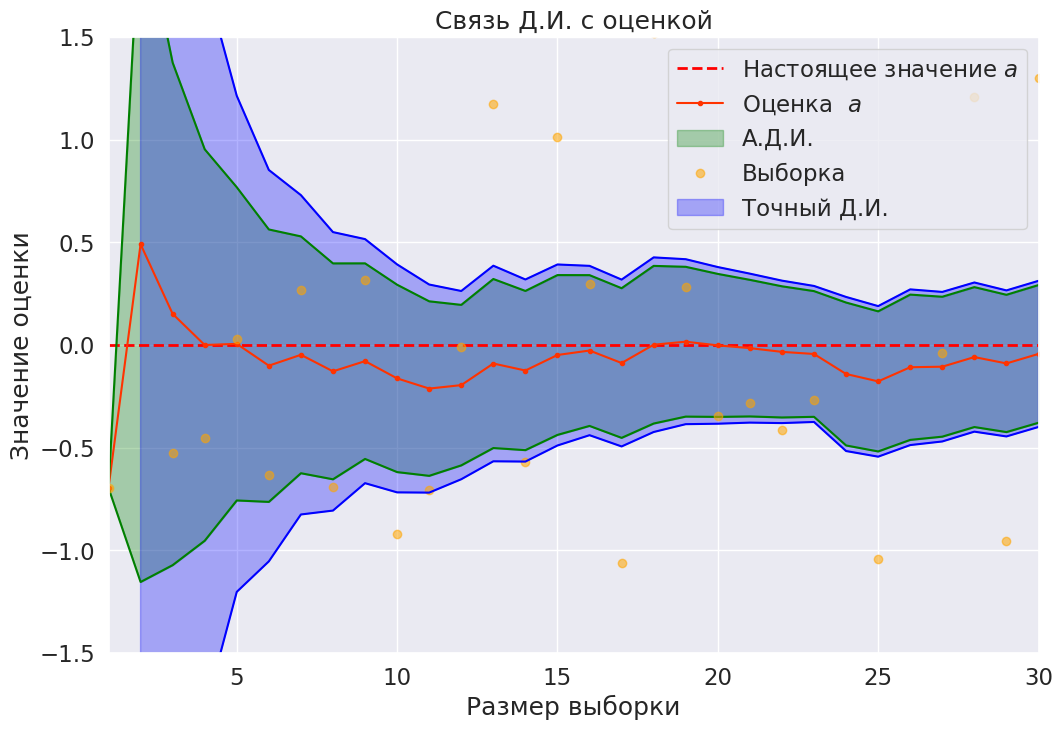

In [13]:
draw_confidence_interval(
    [left_asymptotic, left_t],
    [right_asymptotic, right_t],
    color_interval=["green", "blue"],
    estimation=cumulative_mean(X),
    sample=X,
    label_estimation=["А.Д.И.", "Точный Д.И."],
    ylim=(a - 1.5 * sigma2, a + 1.5 * sigma2),
    xlim=(1, N),
    true_value=a,
    statistics_name=" a",
    dots_flag=True
)

<b><font color="#00b565" size="5">Конец исправлений</font></b>


Как мы видим точный д.и. казался шире, чем а.д.и.. Это может быть связано с тем, что хвосты распределения стьюдента больше чем у нормального, а значит и квантили для распределению Стьюдента в среднем будут больше. Причем при увеличении n эти квантили будут стремится к квантилям нормального распределению.

<b><font color="#00b565" size="5">Сравнил доли покрытия истинного значения параметра сдвига</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Нет сравнения доли покрытия истинного значения параметра сдвига. 


Сравните также эти интервалы по величине доли покрытия истинного значения параметра сдвига.

In [14]:
coverage_asymptotic = (left_asymptotic <= a) & (right_asymptotic >= a)
coverage_rate_asymptotic = np.mean(coverage_asymptotic)

coverage_t = (left_t <= a) & (right_t >= a)
coverage_rate_t = np.mean(coverage_t)

print(f"Доля покрытия для асимптотических интервалов: {coverage_rate_asymptotic:.3f}")
print(f"Доля покрытия для t-интервалов: {coverage_rate_t:.3f}")

Доля покрытия для асимптотических интервалов: 0.967
Доля покрытия для t-интервалов: 0.967


<b><font color="#00b565" size="5">Конец исправлений</font></b>


Как видим, значения покрытия интервалов в целом почти совпадают.

**Вывод:** В данной задаче мы исследовали размеры а.д.и. и точного д.и.. Было выяснено, что не смотря на то что точный д.и. оказался шире, он покрывает параметр сдвига не сильно лучше чем а.д.и.

Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a> и рассмотрите столбцы `Alcalinity of ash`, `Nonflavanoid phenols`, `Proanthocyanins` и `Hue` для вина *первого типа*. Тип вина указан в первом столбце.

Постройте доверительные интервалы для параметров сдвига каждого из столбцов, предполагая, что столбцы имеют нормальное распределение. Нужно построить доверительные интервалы обоих рассмотренных выше типов. Запишите их в виде таблицы.

In [15]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

In [16]:
column_names = ["Alcalinity_of_ash", "Nonflavanoid_phenols", "Proanthocyanins", "Hue"]
table = pd.DataFrame()

for name in column_names:
    tmp_boundries_asymptotic = calculate_asymptotic_confidence_intervals(X[name])
    tmp_boundries_t = calculate_confidence_intervals(X[name])

    table[name + "_t_left"] = tmp_boundries_t[0]
    table[name + "_asymototic_left"] = tmp_boundries_asymptotic[0]
    table[name] = X[name]
    table[name + "_asymototic_right"] = tmp_boundries_asymptotic[1]
    table[name + "_t_right"] = tmp_boundries_t[1]

In [17]:
table.head()

,Alcalinity_of_ash_t_left,Alcalinity_of_ash_asymototic_left,Alcalinity_of_ash,Alcalinity_of_ash_asymototic_right,Alcalinity_of_ash_t_right,Nonflavanoid_phenols_t_left,Nonflavanoid_phenols_asymototic_left,Nonflavanoid_phenols,Nonflavanoid_phenols_asymototic_right,Nonflavanoid_phenols_t_right,Proanthocyanins_t_left,Proanthocyanins_asymototic_left,Proanthocyanins,Proanthocyanins_asymototic_right,Proanthocyanins_t_right,Hue_t_left,Hue_asymototic_left,Hue,Hue_asymototic_right,Hue_t_right
0,NaN,15.600000,15.6,15.600000,NaN,NaN,0.280000,0.28,0.280000,NaN,NaN,2.290000,2.29,2.290000,NaN,NaN,1.040000,1.04,1.040000,NaN
1,-14.553650,10.351012,11.2,16.448988,41.353650,0.142938,0.256141,0.26,0.283859,0.397062,-4.631633,1.085119,1.28,2.484881,8.201633,0.981469,1.038070,1.05,1.051930,1.108531
2,5.887356,11.694438,18.6,18.572229,24.379310,0.230317,0.261521,0.30,0.298479,0.329683,0.194088,1.407875,2.81,2.845459,4.059245,1.015159,1.030761,1.03,1.049239,1.064841
3,10.535753,12.875619,16.8,18.224381,20.564247,0.228915,0.248087,0.24,0.291913,0.311085,1.128352,1.600431,2.18,2.679569,3.151648,0.851202,0.918304,0.86,1.071696,1.138798
4,12.096799,13.771427,21.0,19.508573,21.183201,0.221812,0.248421,0.39,0.339579,0.366188,1.369636,1.630002,1.82,2.521998,2.782364,0.903663,0.940647,1.04,1.067353,1.104337


**Вывод:** Предполагая, что полученные данные распределены нормальны, удалось построить для них д.и. используя ЦПТ и используя распределения Стьюдента. Как видно из таблицы интервалы действительно покрывают истинное значение.

__________________
## Задача 3. 

Пусть $X_1, ..., X_n$ — выборка из распределения $\mathcal{N}(a, \sigma^2)$. Постройте точную доверительную область для параметра $\theta = (a, \sigma^2)$ уровня доверия $\alpha=0.95$ для сгенерированной выборки размера $n \in \{5, 20, 50\}$ из стандартного нормального распределения. Подумайте, как лучше разместить графики, чтобы читателю было удобнее воспринимать результаты.

В ST.3 №6 была получена следующая область доверия для параметра 
$
\theta = \left\{ (a, \sigma^2) \mid \beta \in [\alpha, 1], \sigma^2 \in \left( \frac{nS^2}{\chi^2_{n-1, \frac{1 + \beta}{2}}}, \frac{nS^2}{\chi^2_{n-1, \frac{1 - \beta}{2}}} \right), a \in \left( \overline{X} - \frac{T_{n-1, \frac{1 + \frac{\alpha}{\beta}}{2}}}{\sqrt{n-1}} S, \overline{X} + \frac{T_{n-1, \frac{1 + \frac{\alpha}{\beta}}{2}}}{\sqrt{n-1}} S \right) \right\}.
$

In [18]:
N = 50
a = np.random.randint(-10, 10)
sigma2 = np.random.randint(1, 10)
alpha = 0.95
X = np.random.normal(a, sigma2, N)

X1 = X[:6]
X2 = X[:21]
X3 = X[:51]

In [19]:
def get_a_sigma2_est(sample, alpha, scale=100):
    size = len(sample)
    polygons = []

    S2 = np.var(sample, ddof=0)
    sample_mean = np.mean(sample)
    start = int(alpha * scale)
    for tmp_beta in range(start + 1, scale, 1):
        beta = tmp_beta / scale
        t_left_quant = sps.t.ppf((1 + alpha / beta) / 2, size - 1)
        t_right_quant = sps.t.ppf((1 - alpha / beta) / 2, size - 1)

        chi2_left_quant = sps.chi2.ppf((1 + beta) / 2, size - 1)
        chi2_right_quant = sps.chi2.ppf((1 - beta) / 2, size - 1)

        sigma2_down = np.sqrt(size * S2 / chi2_left_quant)
        sigma2_up = np.sqrt(size * S2 / chi2_right_quant)

        a_left = sample_mean - t_left_quant * np.sqrt(S2) / np.sqrt(size - 1)
        a_right = sample_mean - t_right_quant * np.sqrt(S2) / np.sqrt(size - 1)

        polygons.append([[a_left, sigma2_down], [a_right, sigma2_up]])
    return polygons

<b><font color="#00b565" size="5">Добавил графики</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i>Нет графиков</i>

/tmp/ipykernel_24178/3579486633.py:29: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rectangle = plt.Rectangle(
/tmp/ipykernel_24178/3579486633.py:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rectangle = plt.Rectangle(


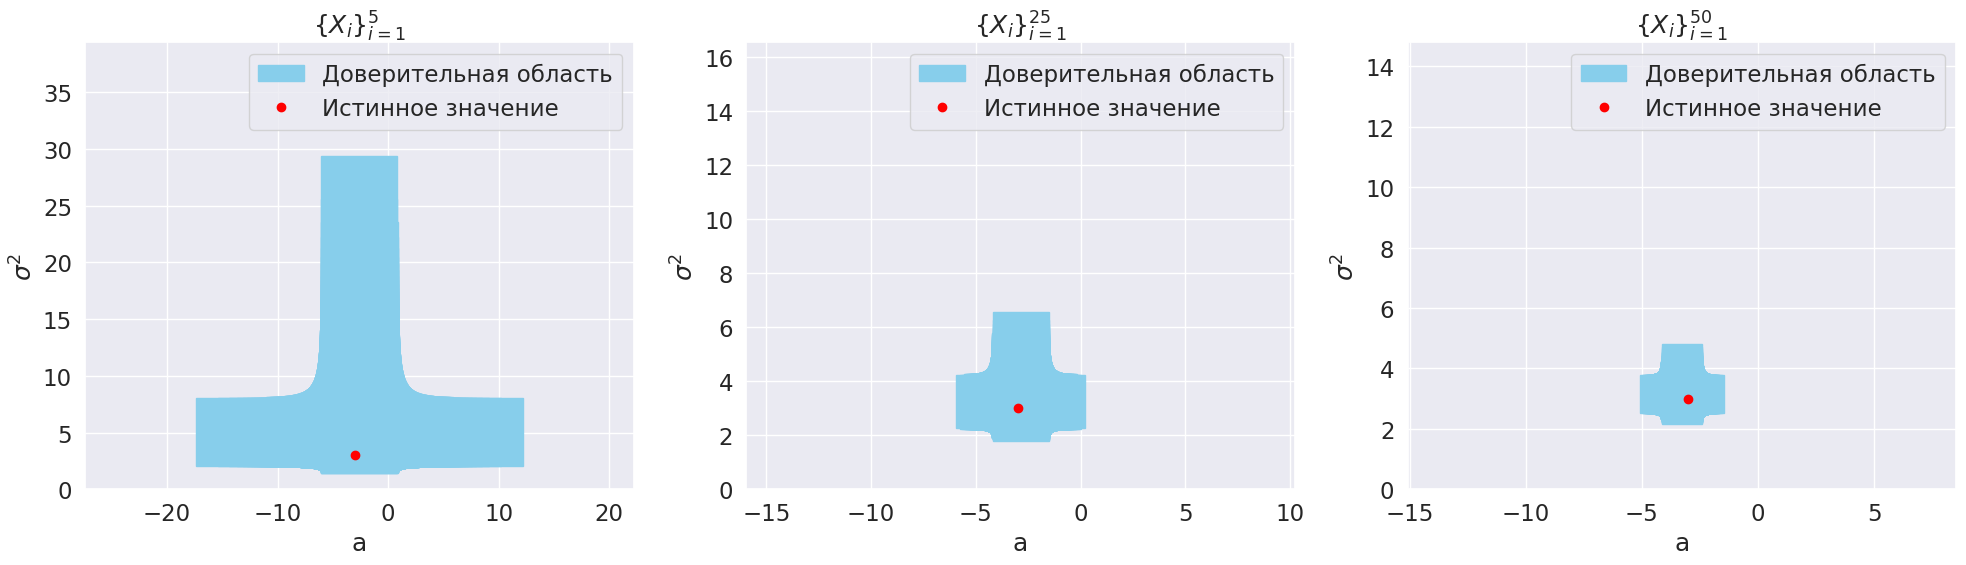

In [20]:
polygons_X1 = get_a_sigma2_est(X1, alpha, scale=10000)
polygons_X2 = get_a_sigma2_est(X2, alpha, scale=10000)
polygons_X3 = get_a_sigma2_est(X3, alpha, scale=10000)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
areas = [[], [], []]

datasets = [
    (polygons_X1, r"$\{X_i\}_{i=1}^{5}$", areas[0]),
    (polygons_X2, r"$\{X_i\}_{i=1}^{25}$", areas[1]),
    (polygons_X3, r"$\{X_i\}_{i=1}^{50}$", areas[2]),
]


for ax, (polygons, title, cur_area) in zip(axs, datasets):
    y_max = 0
    x_left = 1e10
    x_right = -1e10

    once_flag = True
    for rect in polygons:
        cur_area.append(rect)
        lower_left = rect[0]  
        upper_right = rect[1]  
        y_max = max(y_max, upper_right[1])
        x_right = max(x_right, upper_right[0])
        x_left = min(x_left, lower_left[0])

        rectangle = plt.Rectangle(
            lower_left,
            upper_right[0] - lower_left[0],
            upper_right[1] - lower_left[1],
            fill=True,
            color="skyblue",
            alpha=1,
            edgecolor="blue",
        )

        if once_flag:
            rectangle = plt.Rectangle(
                lower_left,
                upper_right[0] - lower_left[0],
                upper_right[1] - lower_left[1],
                fill=True,
                color="skyblue",
                alpha=1,
                edgecolor="blue",
                label="Доверительная область",
            )
        
        ax.add_patch(rectangle)
        once_flag = False

    ax.plot(a, sigma2, "o", color="red", alpha=1, label="Истинное значение")

    ax.set_xlim(x_left - 10, x_right + 10)
    ax.set_ylim(0, y_max + 10)

    ax.set_title(title)
    ax.set_xlabel("a")
    ax.set_ylabel(r"$\sigma^2$")
    ax.legend()

plt.tight_layout()
plt.show()

<b><font color="#00b565" size="5">Конец исправлений</font></b>

<b><font color="#00b565" size="5">Добавил пояснение природы явлений</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i> Нет объяснений природы явлений / Нет ответов на вопрос "почему?". Комм. Например, читатель не найдёт ответ на вопрос «Почему сокращается доверительная область с увеличением размера выборки?».</i>



Так как с увеличеним выборки интервалы в декартовом произведении уменьшаются, то и доверительная область обязана уменьшаться, что мы и видм на примере графиков.

<b><font color="#00b565" size="5">Конец исправлений</font></b>


Исследуйте построенную доверительную область по величине доли покрытия параметра $\theta$.

In [21]:
def is_within_area(rect, theta):
    lower_left = rect[0]
    upper_right = rect[1]
    return (
        lower_left[0] <= a <= upper_right[0] and  # Проверка для theta[0]
        lower_left[1] <= sigma2 <= upper_right[1]  # Проверка для sigma2
    )

# Функция для вычисления доли покрытия
def coverage_fraction(areas, theta):
    covered_count = 0
    for area in areas:
        if is_within_area(area, theta):
            covered_count += 1
    return covered_count / len(areas) if areas else 0

# Вычисляем долю покрытия для каждого датасета
coverage_X1 = coverage_fraction(areas[0], theta)
coverage_X2 = coverage_fraction(areas[1], theta)
coverage_X3 = coverage_fraction(areas[2], theta)

print(f"Доля покрытия для X1: {coverage_X1:.2f}")
print(f"Доля покрытия для X2: {coverage_X2:.2f}")
print(f"Доля покрытия для X3: {coverage_X3:.2f}")

Доля покрытия для X1: 1.00
Доля покрытия для X2: 1.00
Доля покрытия для X3: 1.00


Как видим, точная доверительная область позволила нам полностью покрыть истинное значение $\theta$, причем для всех выборок.

**Вывод:** Мы на практике построили доверительную область для параметра $\theta = (a, \sigma^2)$ распределения $N(a, \sigma^2)$ уровня доверия $\alpha$. Причем наша область покрывает истинное значение даже, лучше чем требуемый уровень доверия. (Возможно ошибкой тому могло послужить неправильно вычисленная область доверия)